# Predicting diabetes progression

## k-Nearest Neighbour(kNN)



In [88]:
# set matplotlib backend to inline
%matplotlib inline

# import modules
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from calendar import c

from sklearn.datasets import load_diabetes

# Load the diabetes dataset from sklearn
diabetes = load_diabetes()

# Access the 'DESCR' attribute
description = diabetes.DESCR
print(description)

df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_diabetes.describe()

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


## Feature Selection

A thorough selection of relevant features is essential for improving the performance of machine learning models. The goal is to reduce dimensionality and concentrate on the most informative features that significantly contribute to the target variable.

The target variable is a quantitative measure of disease progression one year after baseline.

### Univariate Features Selection

The SelectKBest technique with the f_regression score function was used for the first feature selection. This strategy assesses the value of each feature individually by taking into account its relationship to the target variable. I attempted to capture the most influential factors based on their univariate prediction power by selecting the top k=4 characteristics.

In [89]:
# Extract data as numpy arrays of features, X, and target, y
X_diabetes = diabetes.data
y_diabetes = diabetes.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=42)

# Using f_regression score to select top k features (k=4)
selector = SelectKBest(score_func=f_regression, k=4)
X_train_selected = selector.fit_transform(X_train, y_train)

# Get selected feature indices and names
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = [diabetes.feature_names[i] for i in selected_feature_indices]

print(f"Selected Features: {selected_feature_names}")

Selected Features: ['bmi', 'bp', 's4', 's5']


A person with a disease progression value above 140 would be classified as "high risk," and healthcare providers could recommend more frequent monitoring, personalized lifestyle interventions, or early medical interventions to manage or prevent the onset of diabetes.

In [90]:
print("Current target values: ", y_diabetes)

threshold = 140

# Convert to binary: 0 if below threshold, 1 if above or equal to threshold
binary_diabetes = np.where(y_diabetes < threshold, 0, 1)

Current target values:  [151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  9

### Correlation bar plot

The correlation coefficient is utilised as a measurement to assess the strength and direction of the linear relationship between each feature and the target to confirm my feature selection. As can be seen, the top 4 variables with correlation to the target variable are bmi, s5, bp, and s4.

<Figure size 1000x600 with 0 Axes>

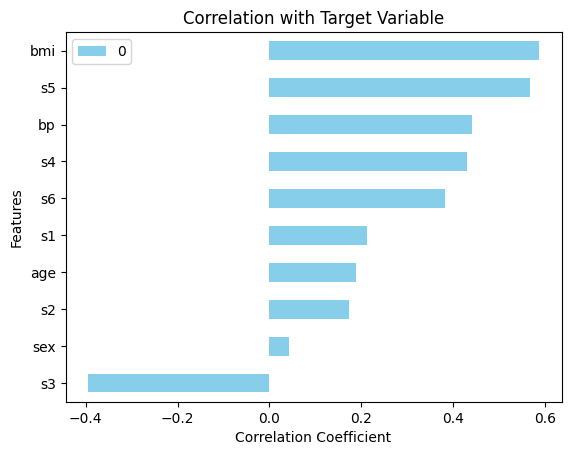

In [91]:
# Calculate correlations between features and target variable
target_correlations = pd.DataFrame(df_diabetes.corrwith(pd.Series(y_diabetes)))

# Plot a bar chart for feature-target correlations
plt.figure(figsize=(10, 6))
target_correlations.sort_values(by=0).plot(kind='barh', color='skyblue')
plt.title('Correlation with Target Variable')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

In [92]:
# Choose features based on the analysis
selected_features = ['bmi', 'bp', 's4', 's5']

# Extract data as numpy arrays of features, X, and target, y
X_diabetes_selected = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)[selected_features].values
y_diabetes_selected = diabetes.target

# Create a DataFrame from the sklearn diabetes dataset
df_diabetes_selected = pd.DataFrame(X_diabetes_selected, columns=selected_features)
df_diabetes_selected['target'] = y_diabetes_selected

# Display the first few rows of the DataFrame
df_diabetes_selected.head()

,bmi,bp,s4,s5,target
0,0.061696,0.021872,-0.002592,0.019907,151.0
1,-0.051474,-0.026328,-0.039493,-0.068332,75.0
2,0.044451,-0.005670,-0.002592,0.002861,141.0
3,-0.011595,-0.036656,0.034309,0.022688,206.0
4,-0.036385,0.021872,-0.002592,-0.031988,135.0


I will be replacing and converting the target variable to be binaries as I am doing a classification model.

In [93]:
X_diabetes = df_diabetes_selected[["bmi", "bp", "s4", "s5"]].values
y_diabetes = binary_diabetes

print(y_diabetes)

[1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1
 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0
 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0
 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1
 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0
 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0
 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0
 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1
 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1
 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0]


In [94]:
X_diabetes.shape, y_diabetes.shape

((442, 4), (442,))

In [95]:
classes_diabetes = list(set(y_diabetes))
classes_diabetes

[0, 1]

Create a scatter plot with the first two characteristics (bmi and bp) from the diabetes dataset. Each point in the plot is coloured according to the class in the goal variable (y_diabetes). This visualisation provides a brief overview of the distribution of points in the feature space.

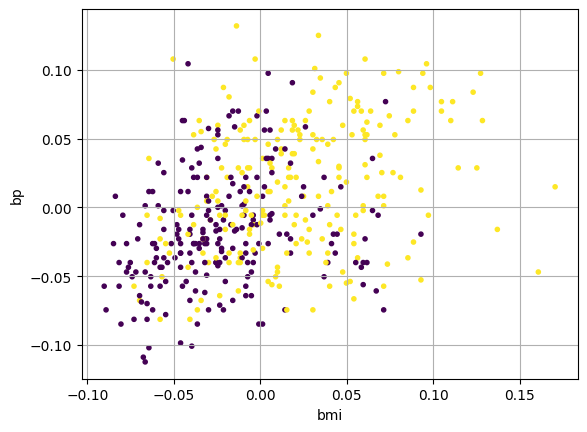

In [96]:
plt.scatter(X_diabetes[:, 0], X_diabetes[:, 1], marker='.', c=y_diabetes/3)
plt.xlabel("bmi")
plt.ylabel("bp")
plt.grid()
plt.show()

In [97]:
df_diabetes_selected.describe()

,bmi,bp,s4,s5,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.245564e-16,-4.797570e-17,-9.042540e-18,9.293722e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-9.027530e-02,-1.123988e-01,-7.639450e-02,-1.260971e-01,25.000000
25%,-3.422907e-02,-3.665608e-02,-3.949338e-02,-3.324559e-02,87.000000
50%,-7.283766e-03,-5.670422e-03,-2.592262e-03,-1.947171e-03,140.500000
75%,3.124802e-02,3.564379e-02,3.430886e-02,3.243232e-02,211.500000
max,1.705552e-01,1.320436e-01,1.852344e-01,1.335973e-01,346.000000


## Scaling of Features

Before building my ML model, I must ensure features are in the same scale. One way is through Standardisation.

### Standardisation
The converted features will be centred at 0 with standard deviations of 1. We termed it z-score in statistics, which is defined by

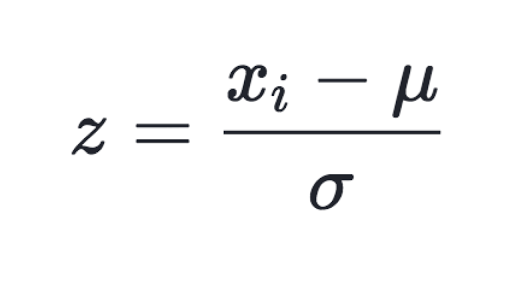

where $\mu$ and $\sigma$ denote the mean and standard deviation of $x$, respectively.

Here, `X` represents our features, and `Xs` represents the scaled features. Each `Xs` column will have a 0 mean and a 1 standard deviation.

In [98]:
# Define your custom scaler
class Standard_Scaler:
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)

    def transform(self, X):
        if self.mean is None or self.std is None:
            raise ValueError("Scaler not fitted. Call fit() before transform().")

        return (X - self.mean) / self.std

# Use the custom scaler for scaling
scaler_diabetes = Standard_Scaler()

# Fit the scaler on the data
scaler_diabetes.fit(X_diabetes)

# Transform the data using the fitted scaler
Xs_diabetes = scaler_diabetes.transform(X_diabetes)

print("Original data:")
print(X_diabetes)
print("\nScaled data:")
print(Xs_diabetes)

Original data:
[[ 0.06169621  0.02187239 -0.00259226  0.01990749]
 [-0.05147406 -0.02632753 -0.03949338 -0.06833155]
 [ 0.04445121 -0.00567042 -0.00259226  0.00286131]
 ...
 [-0.01590626  0.01729339 -0.01107952 -0.04688253]
 [ 0.03906215  0.00121528  0.02655962  0.04452873]
 [-0.0730303  -0.08141314 -0.03949338 -0.00422151]]

Scaled data:
[[ 1.29708846  0.45984057 -0.05449919  0.41853093]
 [-1.08218016 -0.55350458 -0.83030083 -1.43658851]
 [ 0.93453324 -0.1192138  -0.05449919  0.06015558]
 ...
 [-0.33441002  0.36357278 -0.23293356 -0.98564884]
 [ 0.82123474  0.02554979  0.55838411  0.93616291]
 [-1.53537419 -1.71161333 -0.83030083 -0.08875225]]


In [99]:
# Display the scaled features
pd.DataFrame(data=Xs_diabetes, columns=selected_features).describe()

,bmi,bp,s4,s5
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.813235e-17,-1.607563e-17,1.607563e-17,-8.037814e-18
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00
min,-1.897929e+00,-2.363050e+00,-1.606102e+00,-2.651040e+00
25%,-7.196249e-01,-7.706500e-01,-8.303008e-01,-6.989486e-01
50%,-1.531324e-01,-1.192138e-01,-5.449919e-02,-4.093693e-02
75%,6.569519e-01,7.493678e-01,7.213025e-01,6.818506e-01
max,3.585718e+00,2.776058e+00,3.894331e+00,2.808722e+00


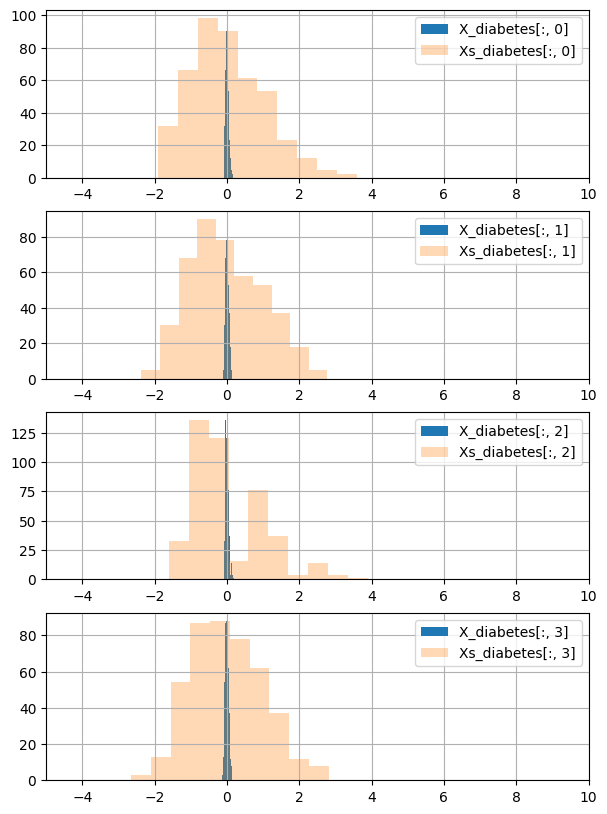

In [100]:
fig, axs = plt.subplots(4, figsize=(7, 10))
for j in range(4):
    axs[j].hist(X_diabetes[:, j], label=f"X_diabetes[:, {j}]")
    axs[j].hist(Xs_diabetes[:, j], label=f"Xs_diabetes[:, {j}]", alpha=0.3)
    axs[j].set_xlim(-5, 10)
    axs[j].legend()
    axs[j].grid()

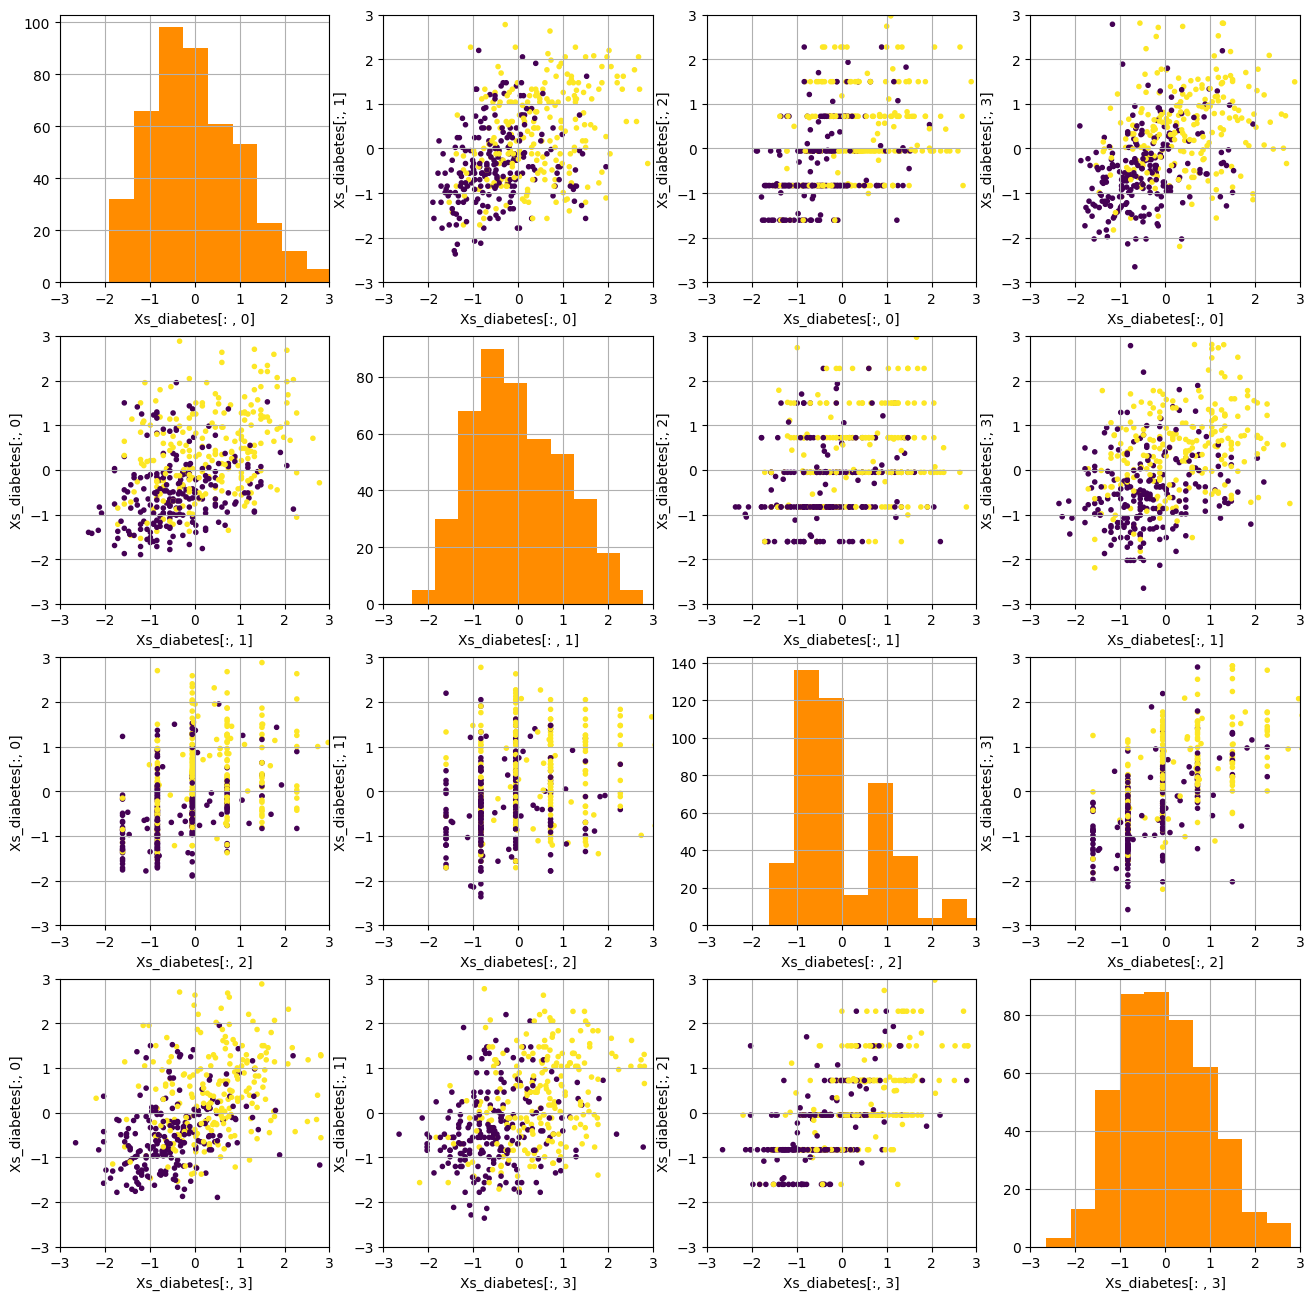

In [101]:
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
for i in range(4):
  for j in range(4):
    if i == j:
      axs[i, j].hist(Xs_diabetes[:, i], color="darkorange")
      axs[i, j].set_xlabel(f"Xs_diabetes[: , {i}]")
      axs[i, j].set_xlim([-3, 3])
      axs[i, j].grid()
    else:
      axs[i, j].scatter(Xs_diabetes[:, i], Xs_diabetes[:, j], marker='.', c=y_diabetes / 3)
      axs[i, j].set_xlabel(f"Xs_diabetes[:, {i}]")
      axs[i, j].set_ylabel(f"Xs_diabetes[:, {j}]")
      axs[i, j].grid()
      axs[i, j].set_xlim([-3, 3])
      axs[i, j].set_ylim([-3, 3])

## Test Train Split and Cross Validation methods

### Train Test Split
Using unknown datapoints to test the data rather than the same points used to train the model.

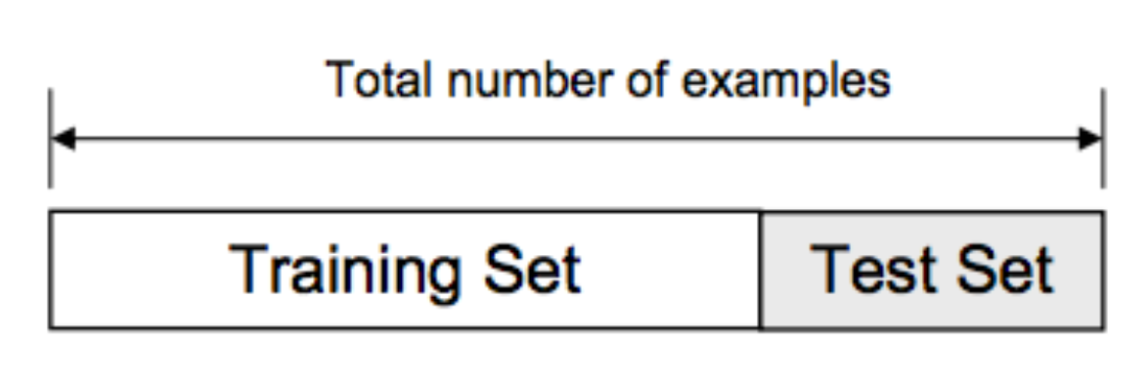

### Cross Validation
When a model is divided into training and testing portions, it is possible that a single type of data point will be allocated completely to either training or testing. As a result, the model would perform poorly. As a result, cross validation procedures can effectively eliminate over-fitting and underfitting issues.

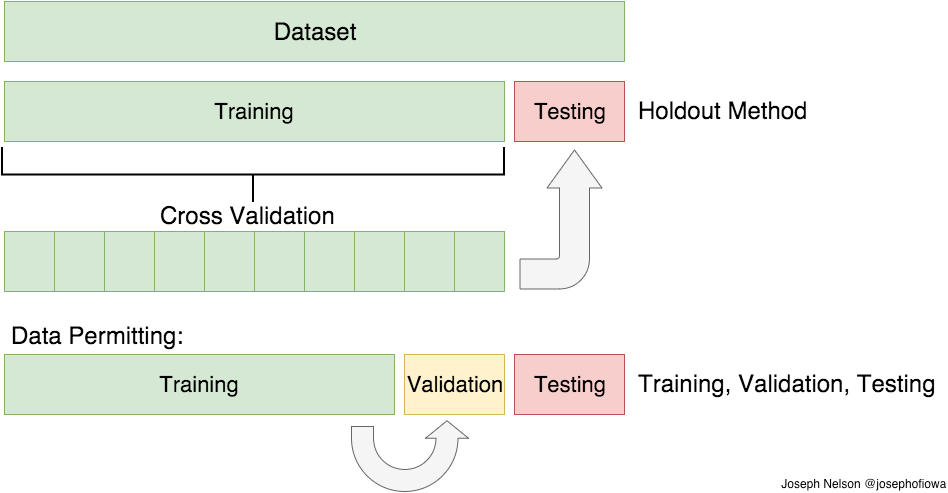

### Counter and Stratify
The Counter function is used to examined the distribution of classes in the 'y_diabetes' target variable, revealing the number of instances for each class. The next stage is to find classes with a small number of instances, namely those with fewer than five occurrences. These classes are thought to be underrepresented or have inadequate data to build robust models. In order to solve this, instances representing these minority classes are eliminated from both the feature set (Xs_diabetes) and the target variable (y_diabetes). The filtered dataset, labelled as 'Xs_diabetes_filtered' and 'y_diabetes_filtered', is then separated into train and test using the train_test_split function. This procedure ensures that the dataset used for model training and evaluation is more balanced, with a more equitable representation of classes, hence improving the model's generalisation performance. The stratify parameter is used to keep the fraction of class distribution constant across both the training and testing sets.

In [102]:
# Define custom train_test_split
def train_test_split(X, y, test_size=0.2, random_state=None, stratify=None):
    N = X.shape[0]
    indices = np.random.RandomState(seed=random_state).permutation(N)
    split = int(np.ceil((1 - test_size) * N))

    train_indices = indices[:split]
    test_indices = indices[split:]

    X_train, X_test = X[train_indices, :], X[test_indices, :]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

In [103]:
class_distribution = Counter(y_diabetes)

In [104]:
# Identify classes with few instances (less than 5)
classes_to_remove = [class_label for class_label, count in class_distribution.items() if count < 5]

# Remove instances corresponding to classes with few instances
Xs_diabetes_filtered = Xs_diabetes[~np.isin(y_diabetes, classes_to_remove)]
y_diabetes_filtered = y_diabetes[~np.isin(y_diabetes, classes_to_remove)]

In [105]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(Xs_diabetes_filtered, y_diabetes_filtered, test_size=0.2, random_state=42, stratify=y_diabetes_filtered)

In [106]:
def distance_metrics(x, y, norm) :
  if norm == 'euclidean' :
    return np.sum((x - y)**2)**0.5
  elif norm == 'manhattan':
    return np.sum(np.abs(x - y))

q1 = np.array([1, 1])
q2 = np.array([0, 0])
q1, q2

(array([1, 1]), array([0, 0]))

In [107]:
distance_metrics(q1, q2, "manhattan")

2

In [108]:
distance_metrics(q1, q2, "euclidean")

1.4142135623730951

In [109]:
# Define custom kNN algorithm
def kNN(X_train, y_train, Q, K, norm='euclidean'):
    y_pred = np.zeros(Q.shape[0])

    for j in range(Q.shape[0]):
        distances = np.zeros(X_train.shape[0])

        for i in range(X_train.shape[0]):
            distances[i] = distance_metrics(X_train[i, :], Q[j, :], norm)

        indices = np.argsort(distances)

        nearest_classes = y_train[indices[:K]]
        counter = Counter(nearest_classes)
        y_pred[j] = counter.most_common(1)[0][0]

    return y_pred

# Define custom accuracy_score function
def accuracy_score(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

In [110]:
test_scores = []
train_scores = []

for i in range(1, 15):
    y_pred_train = kNN(X_train, y_train, X_train, K=i)
    train_scores.append(accuracy_score(y_train, y_pred_train))

    y_pred_test = kNN(X_train, y_train, X_test, K=i)
    test_scores.append(accuracy_score(y_test, y_pred_test))

In [111]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score * 100, list(map(lambda x: x + 1, train_scores_ind))))

Max train score 100.0 % and k = [1, 2]


In [112]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score * 100, list(map(lambda x: x + 1, test_scores_ind))))

Max test score 73.86363636363636 % and k = [7]


### Visualisation of result

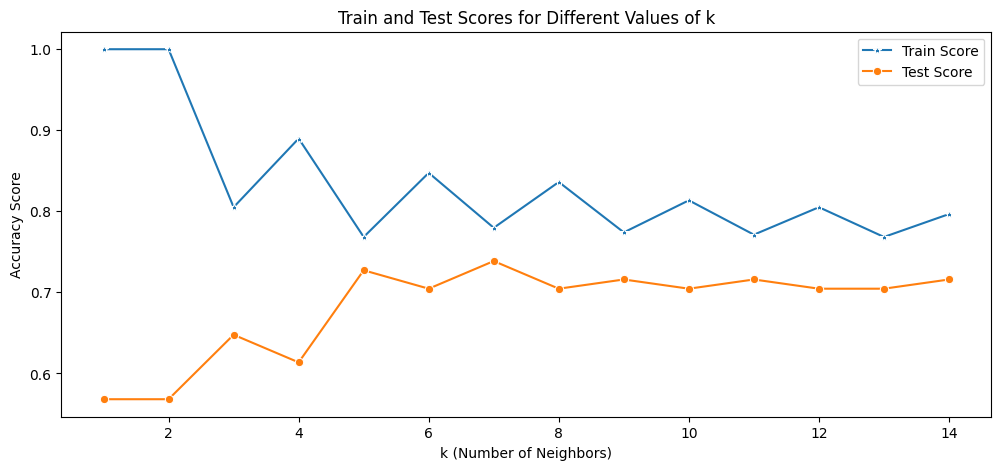

In [113]:
plt.figure(figsize=(12, 5))

p = sns.lineplot(x=range(1, 15), y=train_scores, marker='*', label='Train Score')
p = sns.lineplot(x=range(1, 15), y=test_scores, marker='o', label='Test Score')

plt.title('Train and Test Scores for Different Values of k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

The best first result is captured at k = 7 hence why it is used for the final model. The decision region scatter plot has circles with purple, yellow, or green colors, which represent the predicted labels with each colors representing different predicted class. Whereas the crosses represents the predicted labels by the kNN algorithm.

Accuracy with k=7: 0.74


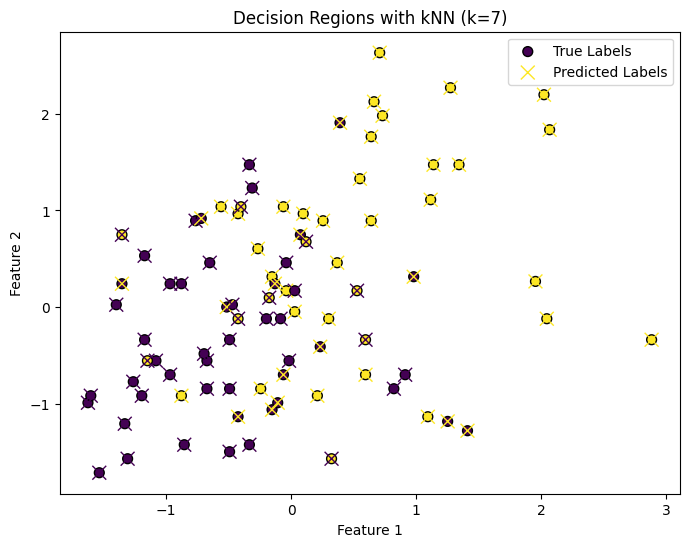

In [114]:
# Setup a kNN classifier with k neighbors
k_value = 7


y_pred_test_custom = kNN(X_train, y_train, X_test, K=k_value)
test_accuracy_custom = accuracy_score(y_test, y_pred_test_custom)
print(f'Accuracy with k={k_value}: {test_accuracy_custom:.2f}')

# Plot decision regions
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolors='k', s=50, label='True Labels')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test_custom, cmap='viridis', marker='x', s=100, linewidths=1, label='Predicted Labels')
plt.title(f'Decision Regions with kNN (k={k_value})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## Model Performance Evaluation

### Confusion matrix

The confusion matrix, which contains binary outputs, is a way for summarising the performance of a classification algorithm.

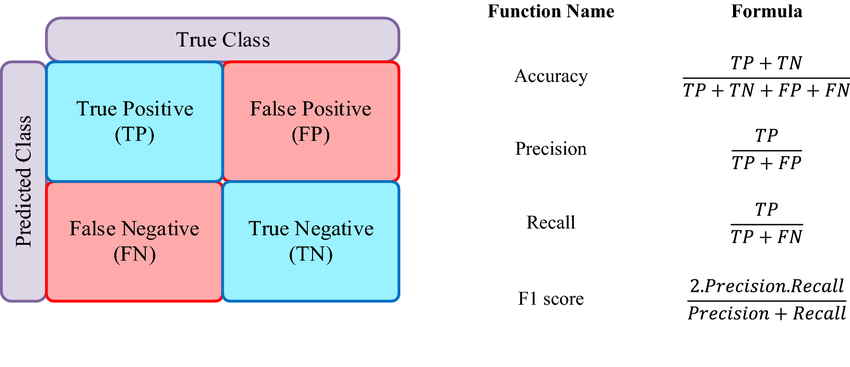

In [115]:
# Define custom confusion matrix function
def confusion_matrix(y_true, y_pred, classes):
    num_classes = len(classes)
    class_to_index = {c: i for i, c in enumerate(classes)}
    matrix = np.zeros((num_classes, num_classes), dtype=int)

    for true, pred in zip(y_true, y_pred):
        matrix[class_to_index[true], class_to_index[pred]] += 1

    return matrix

Accuracy with k=7: 0.74


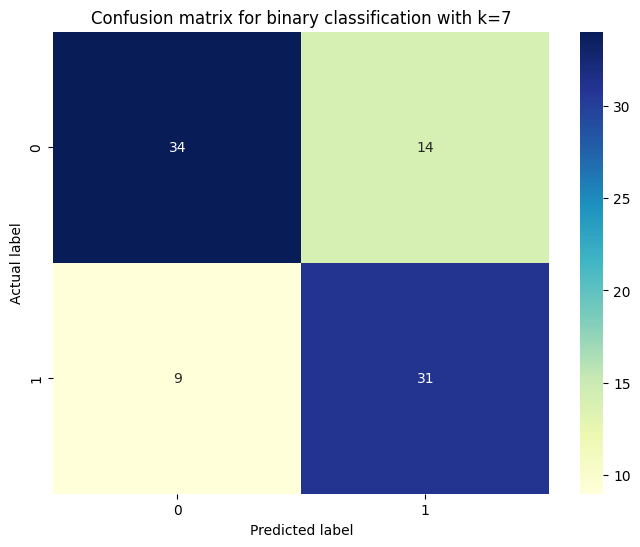

In [116]:
y_pred = kNN(X_train, y_train, X_test, K=k_value)
test_accuracy_custom = accuracy_score(y_test, y_pred)
print(f'Accuracy with k={k_value}: {test_accuracy_custom:.2f}')

# Calculate confusion matrix
classes_diabetes = np.unique(np.concatenate([y_train, y_test, y_pred]))
conf_matrix = confusion_matrix(y_test, y_pred, classes_diabetes)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
p = sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu", fmt='g')

if len(classes_diabetes) == 2:
    plt.title(f'Confusion matrix for binary classification with k={k_value}')
else:
    plt.title(f'Confusion matrix for multi-class classification with k={k_value}')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


### Classification report

Precision Score
    TP – True Positives
    FP – False Positives

    Precision – Accuracy of positive predictions.
    Precision = TP/(TP + FP)


Recall Score
    FN – False Negatives

    Recall(sensitivity or true positive rate): Fraction of positives that were correctly identified.
    Recall = TP/(TP+FN)

F1 Score
    F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers.
    F1 Score takes into account precision and the recall.
    It is created by finding the the harmonic mean of precision and recall.

    F1 = 2 x (precision x recall)/(precision + recall)



#### Precision Evaluation

Precision evaluates the accuracy of detecting specific conditions, measuring the proportion of true positive instances out of all projected positive cases. In our multi-class classification with k=7, precision varies across classes.

* The precision for patients with label 0.0 is 0.79, indicating that almost 80% of the projected cases are accurately identified.
* The precision for patients with label 1.0 is 0.69, signifying a moderate level of accuracy in recognizing this group.

The model's overall precision is 0.74, suggesting reasonable accuracy.

#### Evaluation of Recall (Sensitivity)

Recall, or sensitivity, measures the ratio of accurately anticipated positive instances to all actual positive cases. It answers the question, "How many of all patients with diabetes were correctly labeled?" Considering our model with k=7:

* Class 0.0 has a recall of 0.71, indicating that approximately 71% of true cases were detected accurately.
* Class 1.0 boasts a recall of 0.78, suggesting a good ability to identify true positive cases.

An overall recall of 0.74 indicates commendable performance. High recall is desirable, especially in situations where correctly identifying positive cases is important.

F1 Score Evaluation:

The F1 Score, as the harmonic mean of precision and recall, offers a balanced measure that considers both false positives and false negatives. It is particularly useful in cases with unequal class distributions. For our example:

* Class 0.0 has an F1 Score of 0.75, indicating a robust balance between precision and recall.
* Class 1.0 receives an F1 Score of 0.73, suggesting a good combination of precision and recall.

The total F1 Score of 0.74 emphasizes the model's overall balanced performance. However, continuous efforts for improvement are recommended, especially in precision, recall, and the total F1 Score.

In conclusion, while the model demonstrates success in certain classes, there is ongoing potential for refinement in precision, recall, and the overall F1 Score.

In [117]:
# Define custom classification_report function
def classification_report(y_true, y_pred, classes):
    report = {}

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred, classes)

    for i, class_label in enumerate(classes):
        tp = conf_matrix[i, i]
        fp = np.sum(conf_matrix[:, i]) - tp
        fn = np.sum(conf_matrix[i, :]) - tp

        precision = tp / (tp + fp) if (tp + fp) != 0 else 0
        recall = tp / (tp + fn) if (tp + fn) != 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

        report[class_label] = {
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
        }

    return report

In [118]:
y_pred = kNN(X_train, y_train, X_test, K=k_value)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with k={k_value}: {test_accuracy:.2f}')

# Calculate custom classification report
classes_diabetes = np.unique(np.concatenate([y_train, y_test, y_pred]))
custom_report = classification_report(y_test, y_pred, classes_diabetes)

# Display the custom classification report
if len(classes_diabetes) == 2:
    print(f'Custom Classification Report for binary classification with k={k_value}:')
else:
    print(f'Custom Classification Report for multi-class classification with k={k_value}:')

for class_label, metrics in custom_report.items():
    print(f'Class {class_label}: Precision={metrics["Precision"]:.2f}, Recall={metrics["Recall"]:.2f}, F1 Score={metrics["F1 Score"]:.2f}')


Accuracy with k=7: 0.74
Custom Classification Report for binary classification with k=7:
Class 0.0: Precision=0.79, Recall=0.71, F1 Score=0.75
Class 1.0: Precision=0.69, Recall=0.78, F1 Score=0.73


# Gaussian Naive Bayes

I will start with preprocessing the dataseet to address potential noise, and various exploratory data analyses will be conducted to gain insights into the relationships between different features and the target variable.

In [119]:
df_diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


### Data cleaning and Noise removal

To improve the dataset's quality, potentially noisy data points were detected and filtered. Scatter plots were redone to show how noise removal affected the connection between features and the target variable.

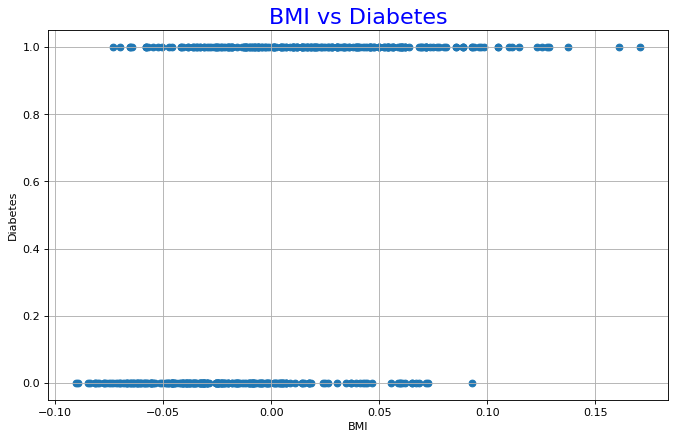

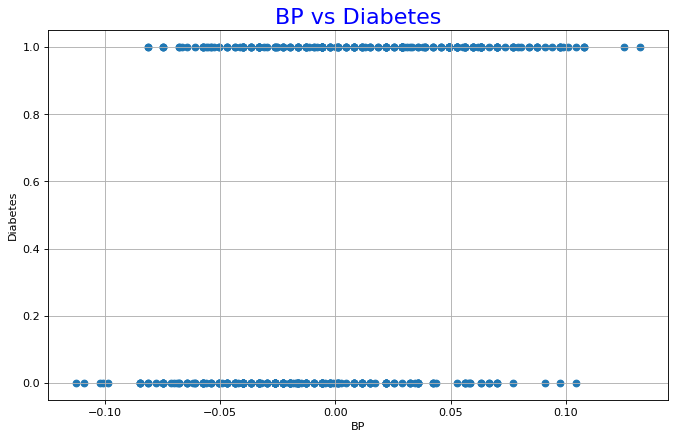

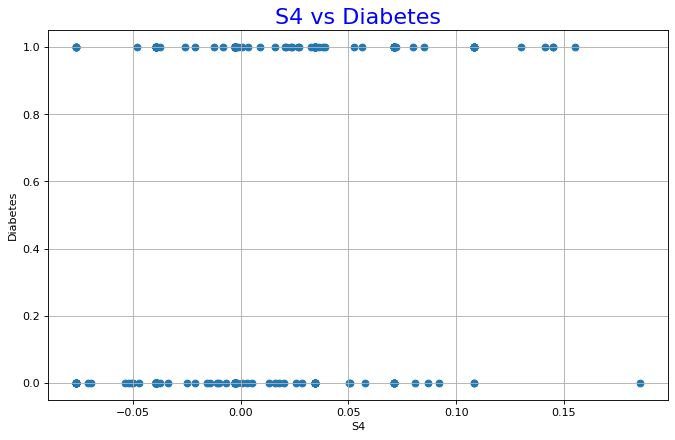

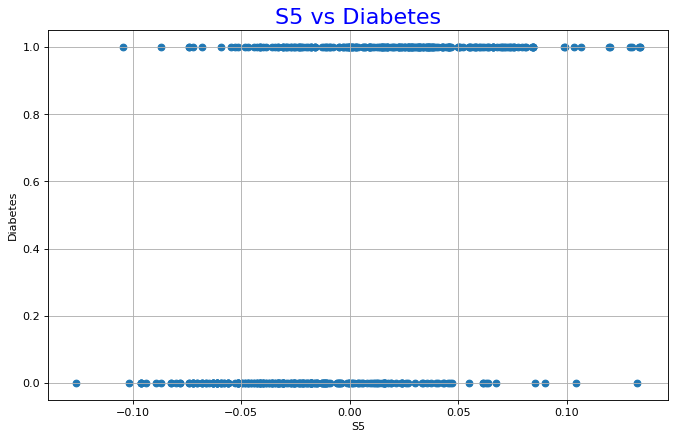

In [120]:
# Drawing plot for BMI
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(df_diabetes['bmi'], y_diabetes)
plt.xlabel('BMI')
plt.ylabel('Diabetes')
plt.grid()
plt.title('BMI vs Diabetes', fontsize=20, color='b')
plt.show()

# Drawing plot for BP
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(df_diabetes['bp'], y_diabetes)
plt.xlabel('BP')
plt.ylabel('Diabetes')
plt.grid()
plt.title('BP vs Diabetes', fontsize=20, color='b')
plt.show()

# Drawing plot for S4
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(df_diabetes['s4'], y_diabetes)
plt.xlabel('S4')
plt.ylabel('Diabetes')
plt.grid()
plt.title('S4 vs Diabetes', fontsize=20, color='b')
plt.show()

# Drawing plot for S5
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(df_diabetes['s5'], y_diabetes)
plt.xlabel('S5')
plt.ylabel('Diabetes')
plt.grid()
plt.title('S5 vs Diabetes', fontsize=20, color='b')
plt.show()

In [121]:
# Find noises
df_bmi = df_diabetes['bmi']< -0.07
df_bp = df_diabetes['bp']< -0.07
df_s4 = df_diabetes['s4']< -0.05
df_s5 = df_diabetes['s5']< -0.05

In [122]:
# Combine conditions using the & operator
df_condition = df_bmi & df_bp & df_s4 & df_s5

# Filter both DataFrame and target variable based on the combined condition
df_diabetes_filtered = df_diabetes[~df_condition]
y_diabetes_filtered = y_diabetes[~df_condition]

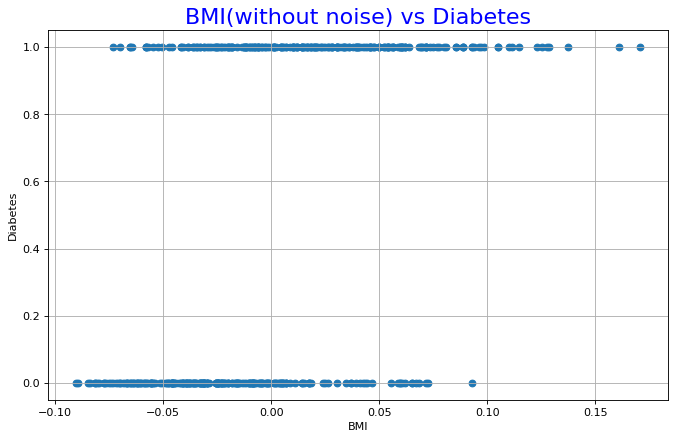

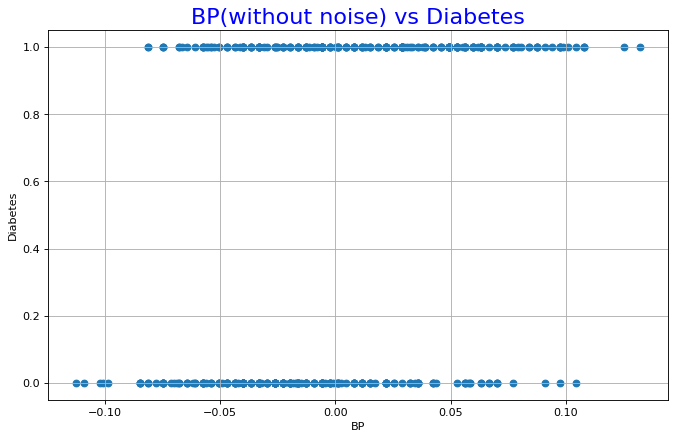

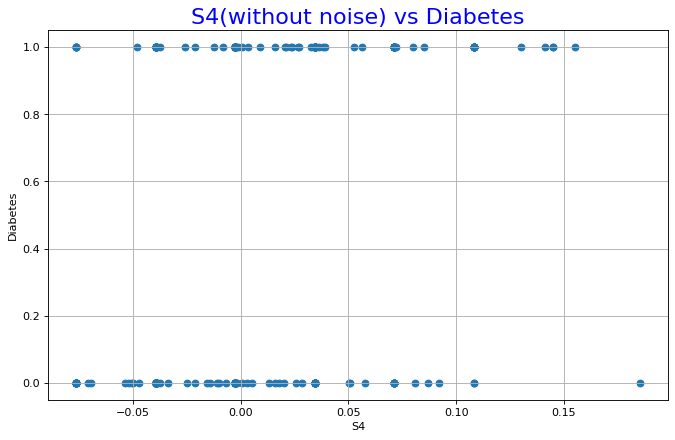

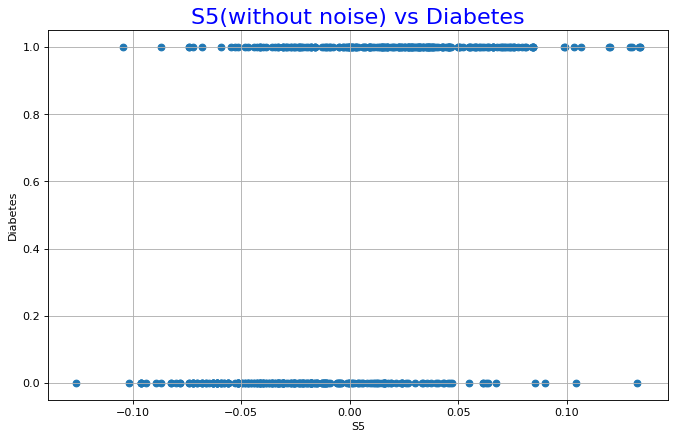

In [123]:
# Drawing plot for BMI without noise
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(df_diabetes_filtered['bmi'], y_diabetes_filtered)
plt.xlabel('BMI')
plt.ylabel('Diabetes')
plt.grid()
plt.title('BMI(without noise) vs Diabetes', fontsize=20, color='b')
plt.show()

# Drawing plot for bp without noise
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(df_diabetes['bp'], y_diabetes_filtered)
plt.xlabel('BP')
plt.ylabel('Diabetes')
plt.grid()
plt.title('BP(without noise) vs Diabetes', fontsize=20, color='b')
plt.show()

# Drawing plot for s4 without noise
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(df_diabetes['s4'], y_diabetes_filtered)
plt.xlabel('S4')
plt.ylabel('Diabetes')
plt.grid()
plt.title('S4(without noise) vs Diabetes', fontsize=20, color='b')
plt.show()

# Drawing plot for s5 without noise
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(df_diabetes['s5'], y_diabetes_filtered)
plt.xlabel('S5')
plt.ylabel('Diabetes')
plt.grid()
plt.title('S5(without noise) vs Diabetes', fontsize=20, color='b')
plt.show()

Count plots were created to visualize the distribution of BMI, Blood Pressure, S4, and S5 in the dataset. These plots provide a clear overview of the occurrence frequency of different values within each feature.

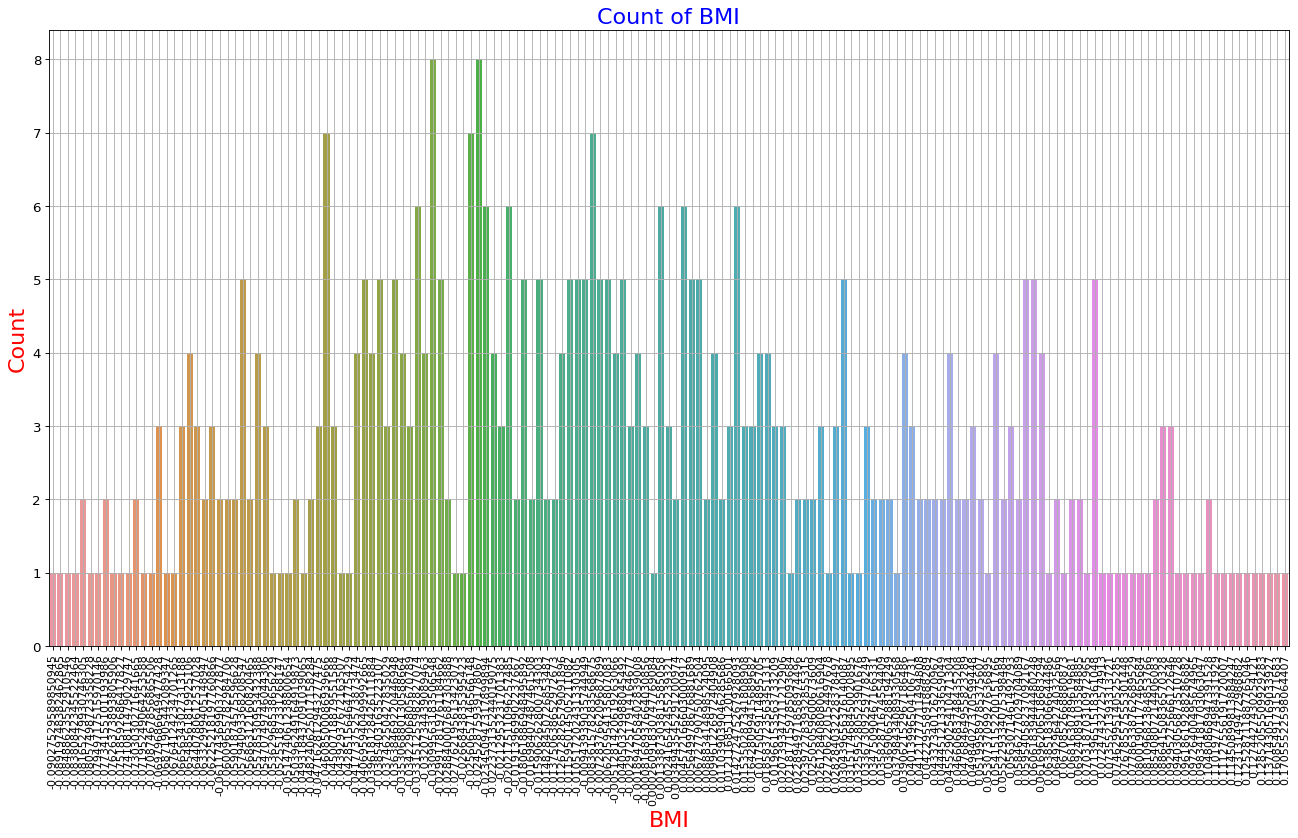

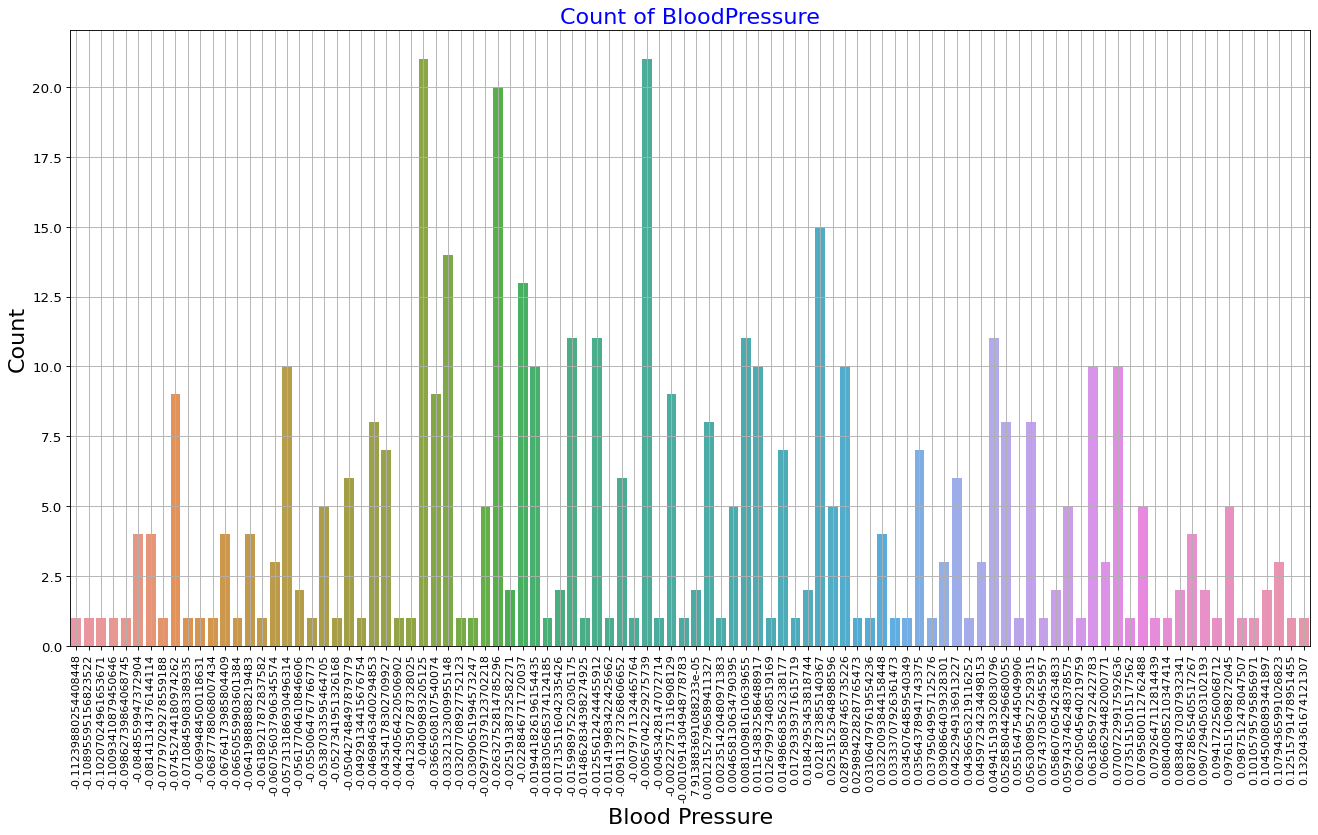

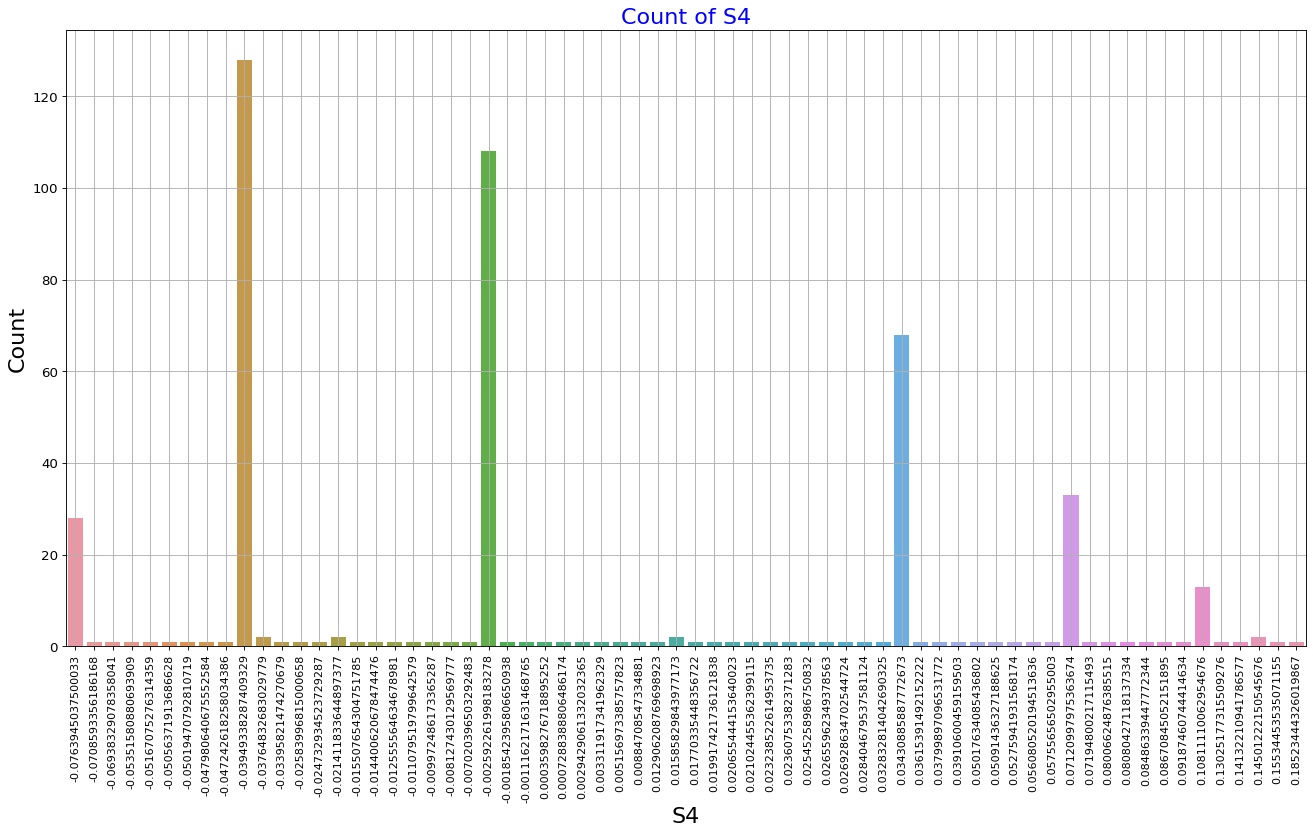

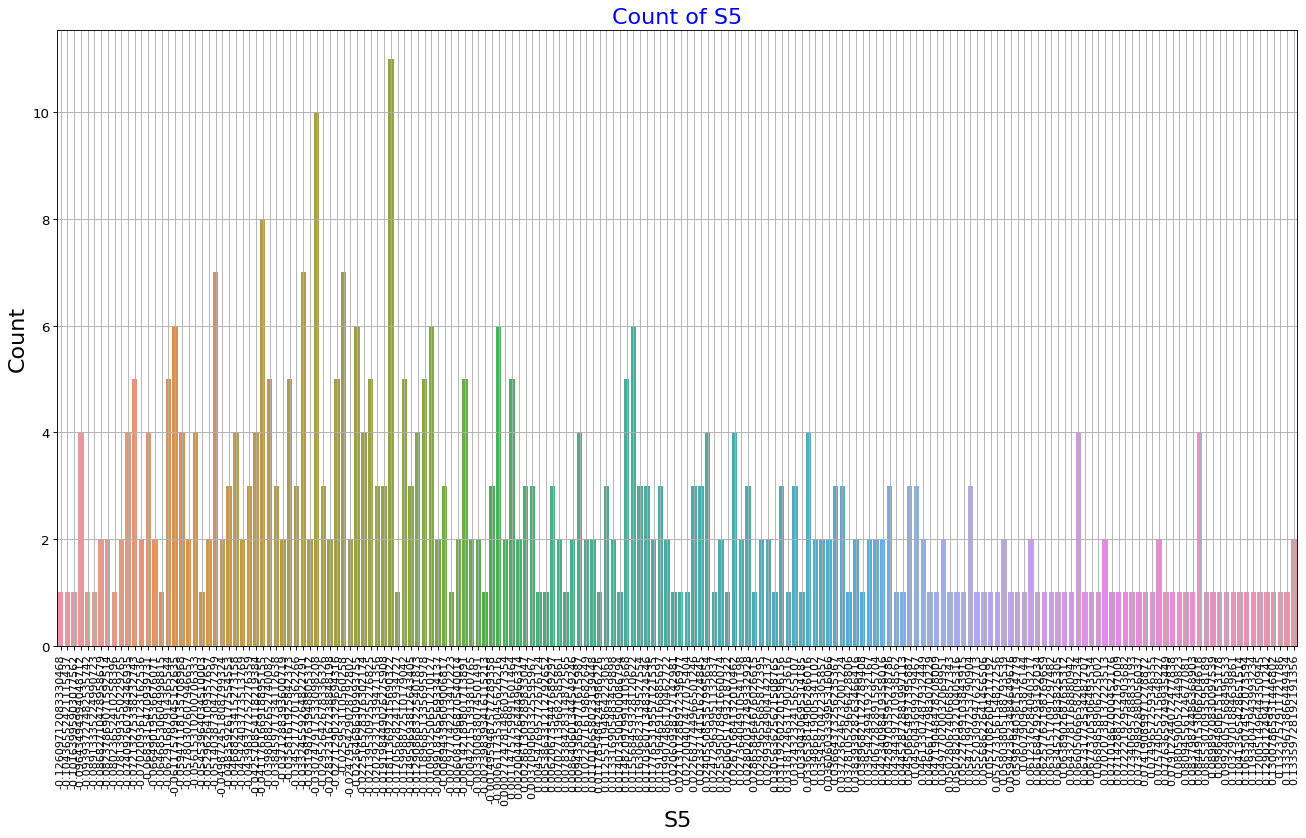

In [124]:
# Drawing plot for BMI
plt.figure(figsize=(20, 10), dpi= 80)
ax = sns.countplot(x= 'bmi', data=df_diabetes)
plt.xticks(rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('BMI', fontsize=20, color='r')
plt.ylabel('Count', fontsize=20, color='r')
plt.title('Count of BMI', fontsize=20, color='b')
plt.grid()
plt.show()

# Drawing plot for BP
plt.figure(figsize=(20, 10), dpi=80)
ax = sns.countplot(x= 'bp', data= df_diabetes)
plt.xticks(rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('Blood Pressure', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Count of BloodPressure', fontsize=20, color='b')
plt.grid()
plt.show()

# Drawing plot for S4
plt.figure(figsize=(20, 10), dpi=80)
ax = sns.countplot(x='s4', data= df_diabetes)
plt.xticks(rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('S4', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.grid()
plt.title('Count of S4', fontsize=20, color='b')
plt.show()

# Drawing plot for S5
plt.figure(figsize=(20, 10), dpi=80)
ax = sns.countplot(x='s5', data= df_diabetes)
plt.xticks(rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('S5', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.grid()
plt.title('Count of S5', fontsize=20, color='b')
plt.show()

A Gaussian Naive Bayes (GNB) classifier was trained on the preprocessed dataset. The model was then evaluated on the test set, and various evaluation metrics were employed to assess its performance.


In [125]:
# Build and evaluate Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Fit the model on the training data
gnb.fit(X_train, y_train)

GaussianNB()

The GNB model's accuracy was calculated to determine its overall performance on the test set. The 'plot_decision_regions' function was used to visualise the model's decision borders, which provided information about its classification areas. In addition, a confusion matrix and a custom classification report were created to provide a more thorough performance analysis.

In [126]:
# Predict on the test data
y_pred_gnb = gnb.predict(X_test)

# Evaluate the accuracy of the Gaussian Naive Bayes model
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f'Accuracy of Gaussian Naive Bayes: {accuracy_gnb:.2f}')

Accuracy of Gaussian Naive Bayes: 0.72


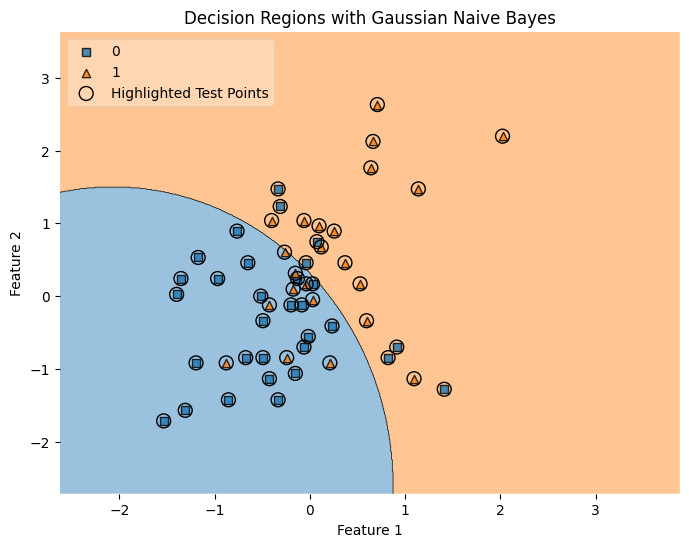

In [127]:
# Plot decision regions for Gaussian Naive Bayes
plt.figure(figsize=(8, 6))
plot_decision_regions(X_test, y_test, clf=gnb, legend=2, X_highlight=X_test, filler_feature_values={2: 0, 3: 0}, filler_feature_ranges={2: 1, 3: 1}, scatter_highlight_kwargs={'s': 100, 'label': 'Highlighted Test Points'})
plt.title('Decision Regions with Gaussian Naive Bayes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [128]:
# Display confusion matrix for Gaussian Naive Bayes
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb, classes_diabetes)

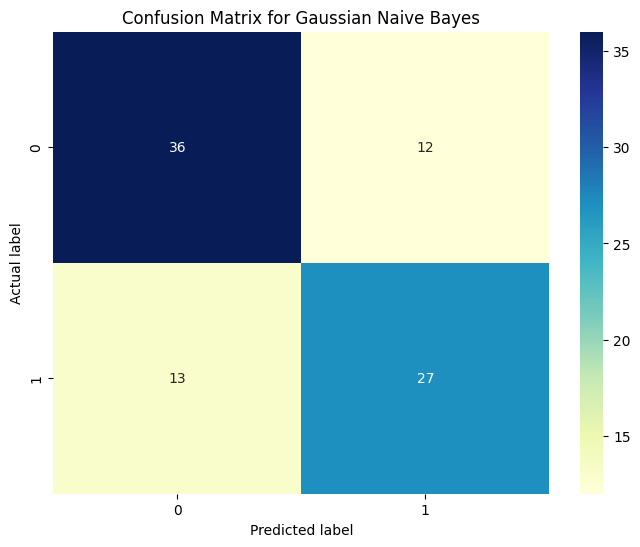

In [129]:
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(conf_matrix_gnb), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion Matrix for Gaussian Naive Bayes')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [130]:
# Display custom classification report for Gaussian Naive Bayes
custom_report_gnb = classification_report(y_test, y_pred_gnb, classes_diabetes)

if len(classes_diabetes) == 2:
    print('Custom Classification Report for binary classification with Gaussian Naive Bayes:')
else:
    print('Custom Classification Report for multi-class classification with Gaussian Naive Bayes:')

for class_label, metrics in custom_report_gnb.items():
    print(f'Class {class_label}: Precision={metrics["Precision"]:.2f}, Recall={metrics["Recall"]:.2f}, F1 Score={metrics["F1 Score"]:.2f}')

Custom Classification Report for binary classification with Gaussian Naive Bayes:
Class 0.0: Precision=0.73, Recall=0.75, F1 Score=0.74
Class 1.0: Precision=0.69, Recall=0.68, F1 Score=0.68


### Result

The accuracy of the GNB model was found to be 0.72. The decision regions plot illustrates the model's classification boundaries, with highlighted test points for clearer visualization. The confusion matrix and custom classification report further break down the model's performance for each class, providing precision, recall, and F1 score metrics.

In conclusion, the Gaussian Naive Bayes classifier demonstrated decently in classifying people with diabetes. The preprocessing steps, including noise removal and exploratory data analysis, were essential in enhancing the model's effectiveness. Further optimization and fine-tuning of the model could be explored to potentially improve its performance.